In [1684]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *


In [1685]:
# prices_sol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/SOLUSDT_2025_1m.csv')
# prices_bnsol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/BNSOLUSDT_2025_1m.csv')



In [1686]:
# merge_ohlc_closing_prices('binance_data/ETH_and_WBETH/2024/1m')

# Get Data 
---

 * ## Closing price data


In [1687]:

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
#prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#Top 100
#-------------------------------------------
prices = pd.read_csv('binance_data/top_100_tickers/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

In [1688]:
#prices = prices[['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m']]

#prices = prices[['DOT/USDT_2024_1m', 'XTZ/USDT_2024_1m']]

#BCH/USDT_2024_1m & DOGE/USDT_2024_1m
#-------------------------------------------
#prices = prices[['BCH/USDT_2024_1m', 'DOGE/USDT_2024_1m']]

#GALA/USDT_2024_1m & GRT/USDT_2024_1m,0.0056584346126191745,-4.071777010162084
#-------------------------------------------
prices = prices[['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m']]

In [1689]:
prices

,GALA/USDT_2024_1m,GRT/USDT_2024_1m
timestamp,,
2024-01-01 00:00:00,0.03037,0.1847
2024-01-01 00:01:00,0.03042,0.1848
2024-01-01 00:02:00,0.03049,0.1850
2024-01-01 00:03:00,0.03050,0.1854
2024-01-01 00:04:00,0.03058,0.1856
...,...,...
2024-06-30 23:55:00,0.02770,0.2108
2024-06-30 23:56:00,0.02768,0.2107
2024-06-30 23:57:00,0.02770,0.2107


In [1690]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

In [1691]:
# prices = prices[prices.diff().ne(0).all(axis=1)]

In [1692]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

 * ## Order book data


In [1693]:
# #BTC and WBTC
# #-------------------------------------------
#prices = pd.read_csv('order_book_data/merged_data/1min/btc_wbtc_combined_1m.csv', index_col=0, parse_dates=True)

#ETH and WBETH
#prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)


In [1694]:
# Only show mid prices
#prices = prices[['btc_mid_price', 'wbtc_mid_price']]

#prices = prices[['eth_mid_price','wbeth_mid_price']]

In [1695]:
# #Fliter prices to end in May
# prices = prices.loc['2024-01-01':'2024-05-31']

In [1696]:
# prices_ETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/ETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_WBETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/WBETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)   
# prices_WBTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/WBTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_BTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/BTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)

In [1697]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [1698]:
# #XVS/USDT_2024_30m & QI/USDT_2024_30m


# crypto_1 = prices.columns[0]
# crypto_2 = prices.columns[1]

# cointegrated_pairs = [(crypto_1,
#   crypto_2,
#   0.731393,
#   0.8501886494196308,
#   0.22)]

In [1699]:
#Params:
window_size = 1440
entry_threshold= 3 #3 was prev
exit_threshold= 0
stop_loss_threshold = 100

In [1700]:
prices.columns

Index(['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m'], dtype='object')

## For Closing Price Data 
---

In [1701]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

#                                   FOR CLOSING PRICE DATA
#------------------------------------------------------------------------------------------
# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)



Testing strategy on pair: GALA/USDT_2024_1m and GRT/USDT_2024_1m ...
Total trades closed: 149 (Wins=149, Losses=0)
Win rate: 1.00


## For Order Book Data 
---

In [1702]:
prices.columns

Index(['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m'], dtype='object')

In [1703]:
# sym1, S1_ask_price, S1_bid_price,S1_ask_amount,S1_bid_amount,sym2,S2_ask_price, S2_bid_price,S2_ask_amount,S2_bid_amount  = prices.columns
# print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")

# #Gather relevant columns from order book data
# #-------------------------------------------
# S1_mid_price = prices[sym1]
# S2_mid_price = prices[sym2]
# #-------------------------------------------
# S1_ask_price = prices[S1_ask_price]
# S1_ask_amount = prices[S1_ask_amount]
# S1_bid_price = prices[S1_bid_price]
# S1_bid_amount = prices[S1_bid_amount]
# #-------------------------------------------
# S2_ask_price = prices[S2_ask_price]
# S2_ask_amount = prices[S2_ask_amount]
# S2_bid_price = prices[S2_bid_price]
# S2_bid_amount = prices[S2_bid_amount]
# #-------------------------------------------

# # Compute the spread series and beta_series 
# spread_series, beta_series, alpha_series = compute_spread_series(S1_mid_price, S2_mid_price, window_size)
# #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# # Compute rolling z-score using the provided helper function.
# zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# #                                   FOR CLOSING PRICE DATA
# #------------------------------------------------------------------------------------------
# # Generate trading signals (positions) based on the spread's z-score
# #positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)

# #                                   FOR ORDER BOOK DATA
# #------------------------------------------------------------------------------------------
# positions, trade_entries, trade_exits = backtest_pair_rolling_order_book(spread_series,
#                                                                          S1_mid_price,
#                                                                          S2_mid_price,
#                                                                          S1_ask_price,
#                                                                          S1_ask_amount,
#                                                                          S1_bid_price,
#                                                                          S1_bid_amount,
#                                                                          S2_ask_price,
#                                                                          S2_ask_amount,
#                                                                          S2_bid_price,
#                                                                          S2_bid_amount,
#                                                                          zscore_series, 
#                                                                          entry_threshold, 
#                                                                          exit_threshold, 
#                                                                          stop_loss_threshold)



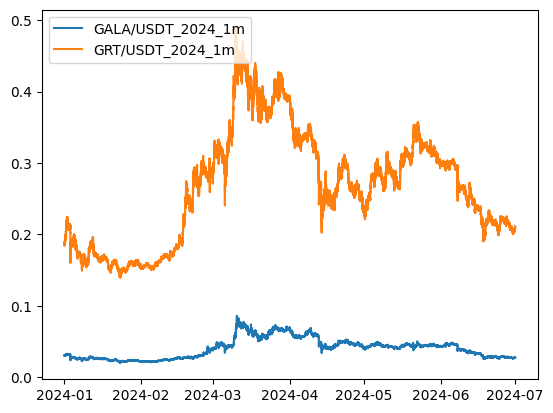

In [1704]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

plt.plot(prices[crypto_1], label=crypto_1)
plt.plot(prices[crypto_2], label=crypto_2)
plt.legend(loc='upper left')
plt.show()






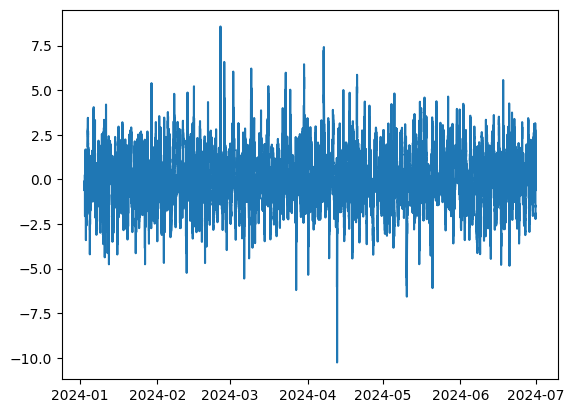

In [1705]:
plt.plot(zscore_series)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.6000e+01, 3.1000e+01, 6.5000e+01, 1.7900e+02,
        5.4600e+02, 1.9520e+03, 6.7000e+03, 1.9012e+04, 3.5977e+04,
        4.8312e+04, 4.7050e+04, 4.3009e+04, 3.1353e+04, 1.5263e+04,
        6.2820e+03, 2.0670e+03, 6.7600e+02, 3.7800e+02, 1.7500e+02,
        7.6000e+01, 3.9000e+01, 2.8000e+01, 6.0000e+00, 5.0000e+00]),
 array([-10.2584176 ,  -9.63075454,  -9.00309148,  -8.37542843,
         -7.74776537,  -7.12010231,  -6.49243926,  -5.8647762 ,
         -5.23711314,  -4.60945009,  -3.98178703,  -3.35412397,
         -2.72646092,  -2.09879786,  -1.4711348 ,  -0.84347175,
         -0.21580869,   0.41185437,   1.03951742,   1.66718048,
          2.29484354,   2.92250659,   3.55016965,   4.17783271,
          4.80549576,   5.43315882,   6.06082188,   6.68848493,
          7.31614799,   7.94381105,   8.5714741 ]),
 <BarContainer object of 30 artists>)

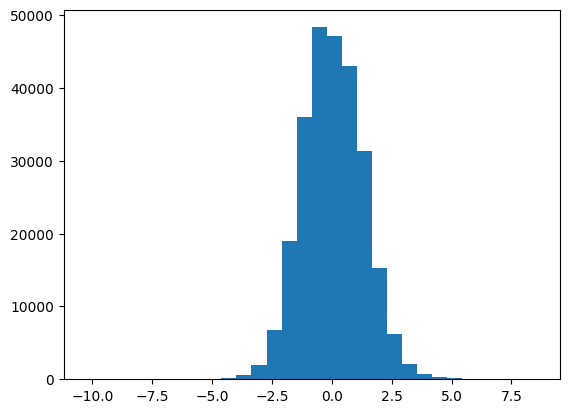

In [1706]:
plt.hist(zscore_series, bins=30)

In [1707]:
# #Compute normalised difference between the two prices
# normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

# #Compute the average normalised difference
# np.mean(normalised_abs_diff)

In [1708]:
# #SETH and ETH Distance: 0.0003968226419110906

# s_eth_distance = 0.0003968226419110906
# w_bitcoin_distance = 0.0006442955592394416

# percentage = s_eth_distance/w_bitcoin_distance * 100
# percentage


In [1709]:
# sym1

In [1710]:
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# len(price_changes_S2_non_zero)

In [1711]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Total trades: 149
Number of profitable trades (proft > 0): 101
Number of non-profitable trades (proft < 0): 48
Total return €: 3610.92
Total return %: 36.11%
Long spread losses: 23, Short spread losses: 25
Number of Dual-leg profitable trades: 42
Dual leg trade profit rate: 28.19%


In [1712]:
exit_times

[Timestamp('2024-01-03 14:36:00'),
 Timestamp('2024-01-04 18:33:00'),
 Timestamp('2024-01-05 12:46:00'),
 Timestamp('2024-01-06 23:04:00'),
 Timestamp('2024-01-07 04:17:00'),
 Timestamp('2024-01-08 04:01:00'),
 Timestamp('2024-01-10 08:41:00'),
 Timestamp('2024-01-10 11:15:00'),
 Timestamp('2024-01-10 20:18:00'),
 Timestamp('2024-01-11 02:09:00'),
 Timestamp('2024-01-11 13:19:00'),
 Timestamp('2024-01-12 06:20:00'),
 Timestamp('2024-01-12 20:01:00'),
 Timestamp('2024-01-14 06:28:00'),
 Timestamp('2024-01-16 08:46:00'),
 Timestamp('2024-01-18 04:54:00'),
 Timestamp('2024-01-20 06:52:00'),
 Timestamp('2024-01-23 10:18:00'),
 Timestamp('2024-01-27 13:23:00'),
 Timestamp('2024-01-28 23:14:00'),
 Timestamp('2024-01-29 17:38:00'),
 Timestamp('2024-01-31 13:04:00'),
 Timestamp('2024-02-01 01:38:00'),
 Timestamp('2024-02-01 20:16:00'),
 Timestamp('2024-02-03 00:19:00'),
 Timestamp('2024-02-03 16:16:00'),
 Timestamp('2024-02-03 21:27:00'),
 Timestamp('2024-02-05 15:36:00'),
 Timestamp('2024-02-

In [1713]:
cumulative_profit_series[-11]

/var/folders/v0/xxx_2wqx4qsc_858pvgmg3_m0000gp/T/ipykernel_82153/3123887299.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_profit_series[-11]


np.float64(2920.636157210338)

In [1714]:
exit_times[0]

Timestamp('2024-01-03 14:36:00')

In [1715]:
oak = []

print(sum(oak))

0


In [1716]:
#Most profitable trade

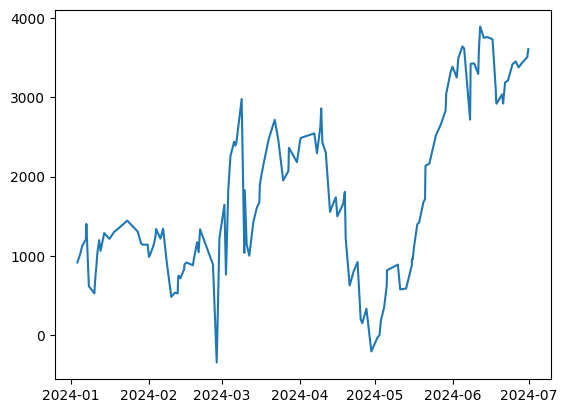

In [1717]:
plt.plot(cumulative_profit_series)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  1.,  1.,  0.,  2.,
         0.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,  3.,  0.,  3.,  9.,
         3.,  4.,  6.,  7., 16., 17., 11.,  5., 15.,  7.,  6.,  6.,  1.,
         2.,  0.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1944.83392748, -1909.71225036, -1874.59057323, -1839.46889611,
        -1804.34721899, -1769.22554186, -1734.10386474, -1698.98218761,
        -1663.86051049, -1628.73883337, -1593.61715624, -1558.49547912,
        -1523.37380199, -1488.25212487, -1453.13044775, -1418.00877062,
        -1382.8870935 , -1347.76541638, -1312.64373925, -1277.52206213,
        -1242.400385  , -1207.27870788, -1172.15703076, -1137.03535363,
  

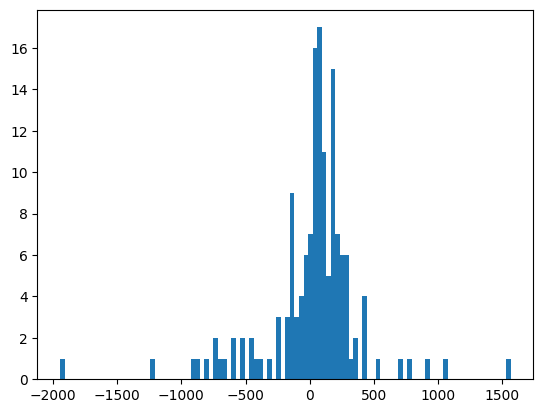

In [1718]:
plt.hist(trade_profits, bins=100)

In [1719]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -334.44285863943657
Average trade win:  € 194.694780551475
Number of negative profits(profits that were less than the transaction cost):  48
Number of positive profits (profits that were greater than the transaction cost):  101


In [1720]:
#Get index of greatest loss
max_loss_index = trade_profits.index(min(trade_profits))
max_loss_index

55

In [1721]:
trade_entries[max_loss_index]

{'time': Timestamp('2024-03-09 09:43:00'),
 'S1': np.float64(0.04774),
 'S2': np.float64(0.4118),
 'z': np.float64(3.0299453315460574),
 'position': -1}

In [1722]:
trade_exits[max_loss_index]

{'time': Timestamp('2024-03-09 23:19:00'),
 'S1': np.float64(0.05736),
 'S2': np.float64(0.4144),
 'z': np.float64(-0.11303787626319461),
 'exit_type': 'win'}

In [1723]:
# #Calculate returns based on the trade profits
# trade_profits = np.array(trade_profits)
# returns = trade_profits/initial_capital * 100

# #Plot the returns
# plt.hist(returns, bins=50, edgecolor='black')
# plt.xlabel('Returns (%)')   
# plt.ylabel('Frequency')
# plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [1724]:
# #Calculate percentage price changes for each asset
# price_changes_S1 = np.array(price_changes_S1)

In [1725]:
# #Obtain non-zero price changes
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# #Convert price changes to percentage
# price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
# price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

# #Print average price changes
# print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
# print(f"Number of trades: {len(price_changes_S1_non_zero)}")

In [1726]:
# percentage_return = cumulative_profit_series[-1]/initial_capital * 100
# print(f"Percentage return: {percentage_return:.2f} %")


# #PROFIT SHOULD BE 0.15 EUR

# plt.figure(figsize=(10,6))
# plt.plot(cumulative_profit_series)
# plt.title('Cumulative PnL')
# plt.xlabel('Time')
# plt.ylabel('PnL (EUR)')
# plt.show()

In [1727]:
max_loss_index

55

In [1728]:
print(f"MAX LOSS: {trade_profits[max_loss_index]}")

MAX LOSS: -1944.833927480564


In [1729]:
#Get trade entry and exit times
trade_entry_min_profit = entry_times[max_loss_index],
trade_exit_min_profit = exit_times[max_loss_index]

print(f"Trade entry time: {trade_entry_min_profit}")
print(f"Trade exit time: {trade_exit_min_profit}")

Trade entry time: (Timestamp('2024-03-09 09:43:00'),)
Trade exit time: 2024-03-09 23:19:00


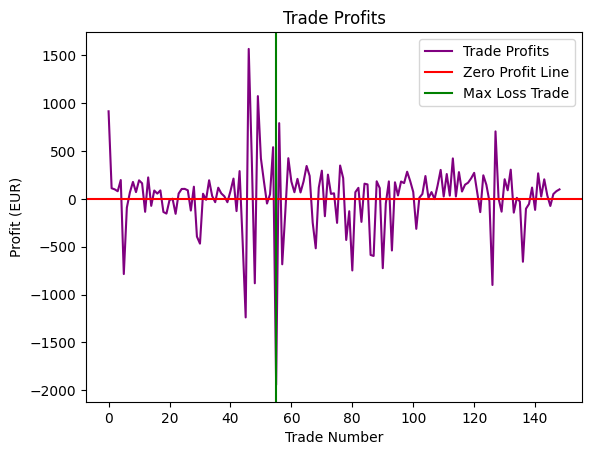

In [1730]:
plt.plot(trade_profits, label='Trade Profits', color = 'purple')
plt.axhline(y=0, color='r', linestyle='-', label='Zero Profit Line')
plt.axvline(x=max_loss_index, color='g', linestyle='-', label='Max Loss Trade')
plt.title('Trade Profits')
plt.xlabel('Trade Number')
plt.ylabel('Profit (EUR)')
plt.legend()

Average trade duration: 333.41 minutes


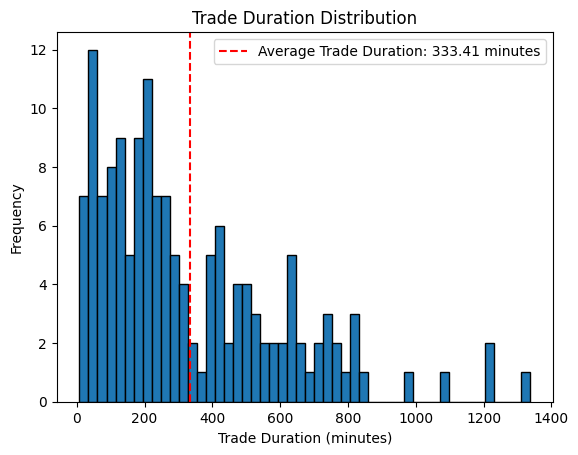

In [1731]:
#Calculate the durations of all the trades
#trade_durations = [exit - entry for entry, exit in zip(entry_times, exit_times)]
trade_durations = [(exit_time - entry_time).total_seconds() / 60 for entry_time, exit_time in zip(entry_times, exit_times)]

average_trade_duration = np.mean(trade_durations)
print(f"Average trade duration: {average_trade_duration:.2f} minutes")
#Plot distribution of trade durations
plt.hist(trade_durations, bins=50, edgecolor='black')
plt.axvline(x=average_trade_duration, color='red', linestyle='--', label=f'Average Trade Duration: {average_trade_duration:.2f} minutes')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Trade Duration Distribution')
plt.legend()
plt.show()

In [1732]:
trade_durations[1]

704.0

Text(0.5, 1.0, 'Trade Profit vs Trade Duration')

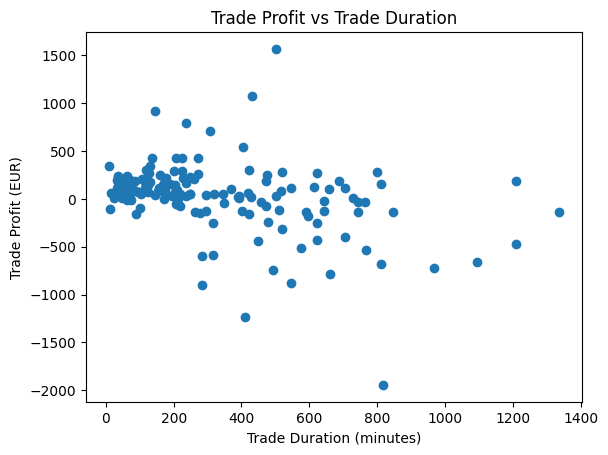

In [1733]:
#Plot trade profits vs trade durations
plt.scatter(trade_durations, trade_profits)
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Trade Profit (EUR)')
plt.title('Trade Profit vs Trade Duration')


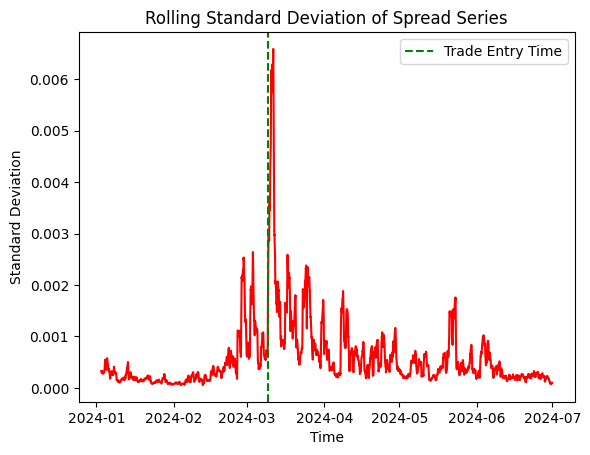

In [1734]:
plt.plot(rolling_std, color = 'red')
plt.axvline(trade_entry_min_profit, color='green', linestyle='--', label='Trade Entry Time')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation of Spread Series')
plt.legend()


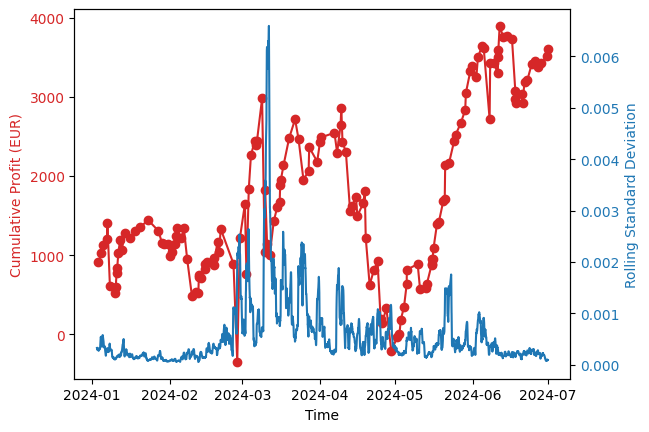

In [1735]:
#Plot cumulative profit series and rolling standard deviation on same plot

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')      
ax1.set_ylabel('Cumulative Profit (EUR)', color=color)
ax1.plot(cumulative_profit_series, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Rolling Standard Deviation', color=color)
ax2.plot(rolling_std, color=color)
ax2.tick_params(axis='y', labelcolor=color) 


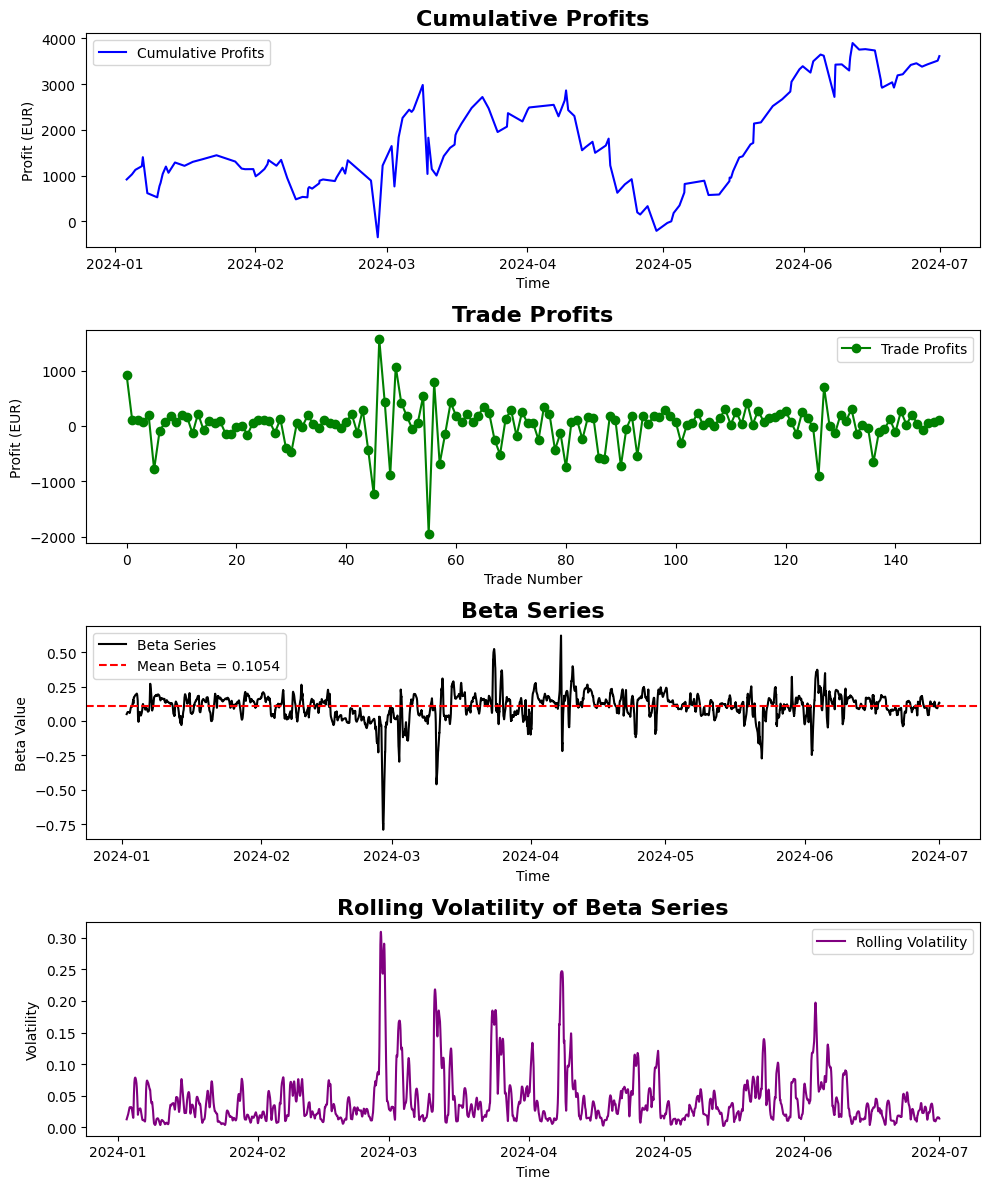

In [1795]:
# Create a figure for stacked plots
plt.figure(figsize=(10, 12))

# First subplot: Cumulative Profits
plt.subplot(4, 1, 1)
plt.plot(cumulative_profit_series, label='Cumulative Profits', color='Blue')
plt.title('Cumulative Profits', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Profit (EUR)')
plt.legend()


# First subplot: Trade Profits
plt.subplot(4, 1, 2)
plt.plot(trade_profits, label='Trade Profits', color='Green', marker='o')
plt.title('Trade Profits', fontsize=16, fontweight='bold')
plt.xlabel('Trade Number')
plt.ylabel('Profit (EUR)')
plt.legend()


# Second subplot: Beta Series with Mean Line
plt.subplot(4, 1, 3)
mean_beta = np.mean(beta_series)
plt.plot(beta_series, color='black', label='Beta Series')
plt.axhline(y=mean_beta, color='red', linestyle='--', label=f'Mean Beta = {mean_beta:.4f}')
plt.title('Beta Series', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Beta Value')
plt.legend()

# Third subplot: Rolling Volatility of Beta Series
# Adjust the layout to 4 rows and 1 column
plt.subplot(4, 1, 4)
rolling_volatility = beta_series.rolling(window_size).std()
plt.plot(rolling_volatility, color='purple', label='Rolling Volatility')
plt.title('Rolling Volatility of Beta Series', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Relationship between returns volatility and Beta volatility
---

In [1777]:
from scipy import stats


trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges
beta_series_trade_ranges = [beta_series[entry:exit] for entry, exit in trade_ranges]

#Calcullate the volatility of the beta series in the trade ranges
volatility_trade_ranges = [np.std(beta_series_trade_range) for beta_series_trade_range in beta_series_trade_ranges]

#Calculate range of the beta series in the trade ranges
abs_beta_trade_ranges = [np.abs(np.max(beta_series_trade_range) - np.min(beta_series_trade_range)) for beta_series_trade_range in beta_series_trade_ranges]

#Calculate the absolute returns for each trade
absolute_trade_returns = [np.abs(trade_profit/initial_capital) for trade_profit in trade_profits]

#-------------------------------------------


# #Perform linear regression to determine if there is a relationship between absolute returns and volatility
# slope, intercept, r_value, p_value, std_err = stats.linregress(volatility_trade_ranges, absolute_trade_returns)
# print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-squared: {r_value**2:.4f}, P-value: {p_value:.4f}, Standard Error: {std_err:.4f}")

# if p_value < 0.05:
#     print("There is a significant relationship between absolute returns and volatility")
# else:
#     print("There is no significant relationship between absolute returns and volatility")

# #Plot the relationship between absolute returns and volatility with a linear regression line
# plt.scatter(volatility_trade_ranges, absolute_trade_returns)
# plt.plot(volatility_trade_ranges, [slope*volatility_val + intercept for volatility_val in volatility_trade_ranges], color='red', label='Linear Regression')
# plt.xlabel('Beta Volatility')
# plt.ylabel('Absolute Returns')
# plt.title('Absolute Returns vs Volatility')
# plt.legend()
# plt.show()

#-------------------------------------------



Text(0.5, 1.0, 'Absolute Returns vs Beta Range')

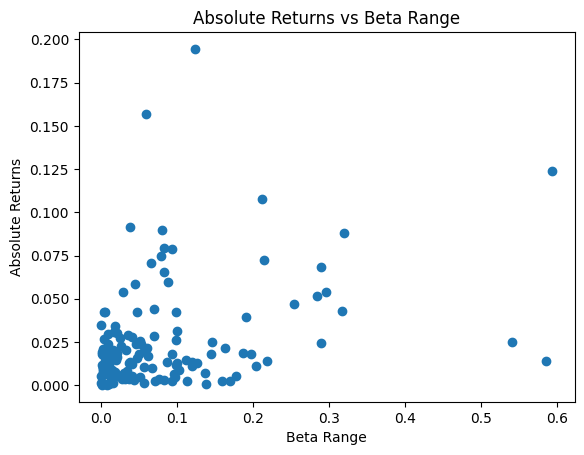

In [1779]:
#Plot absolute_trade_returns vs abs_beta_trade_ranges
plt.scatter(abs_beta_trade_ranges, absolute_trade_returns)
plt.xlabel('Beta Range')
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns vs Beta Range')

(array([ 7., 12.,  7.,  8.,  9.,  5.,  9., 11.,  7.,  7.,  5.,  4.,  2.,
         1.,  5.,  6.,  2.,  4.,  4.,  3.,  2.,  2.,  2.,  5.,  2.,  1.,
         2.,  3.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([   9. ,   35.6,   62.2,   88.8,  115.4,  142. ,  168.6,  195.2,
         221.8,  248.4,  275. ,  301.6,  328.2,  354.8,  381.4,  408. ,
         434.6,  461.2,  487.8,  514.4,  541. ,  567.6,  594.2,  620.8,
         647.4,  674. ,  700.6,  727.2,  753.8,  780.4,  807. ,  833.6,
         860.2,  886.8,  913.4,  940. ,  966.6,  993.2, 1019.8, 1046.4,
        1073. , 1099.6, 1126.2, 1152.8, 1179.4, 1206. , 1232.6, 1259.2,
        1285.8, 1312.4, 1339. ]),
 <BarContainer object of 50 artists>)

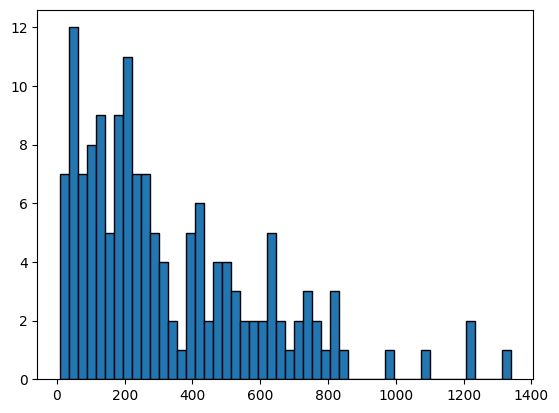

In [1771]:
beta_lengths = [len(beta_series_trade_range) for beta_series_trade_range in beta_series_trade_ranges]

plt.hist(beta_lengths, bins=50, edgecolor='black')

# Delta Neutrality 
---

In [1741]:
# #Plot trade profits vs absolute delta neutrality

# from scipy import stats


# absolute_delta_neutrality = [abs(x) for x in delta_neutrality]

# #Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
# slope, intercept, r_value, p_value, std_err = stats.linregress(absolute_delta_neutrality, trade_profits)

# print(f"Slope: {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")
# print(f"R-squared: {r_value**2:.4f}")
# print(f"P-value: {p_value:.4f}")

# #Plot trade profits vs absolute delta neutrality and the regression line
# plt.plot(absolute_delta_neutrality, trade_profits, 'o', label='Trade Profits')
# plt.plot(absolute_delta_neutrality, intercept + slope*np.array(absolute_delta_neutrality), 'r', label='Regression Line')
# plt.xlabel('Absolute Delta Neutrality')
# plt.ylabel('Trade Profit (EUR)')
# plt.title('Trade Profit vs Absolute Delta Neutrality')
# plt.legend()
# plt.show()

# # plt.scatter(absolute_delta_neutrality, trade_profits, )
# # plt.xlabel('Delta Neutrality')
# # plt.ylabel('Trade Profit (EUR)')
# # plt.title('Trade Profit vs Delta Neutrality')


Slope: 0.2109
Intercept: 0.0165
R-squared: 0.1277
P-value: 0.0000


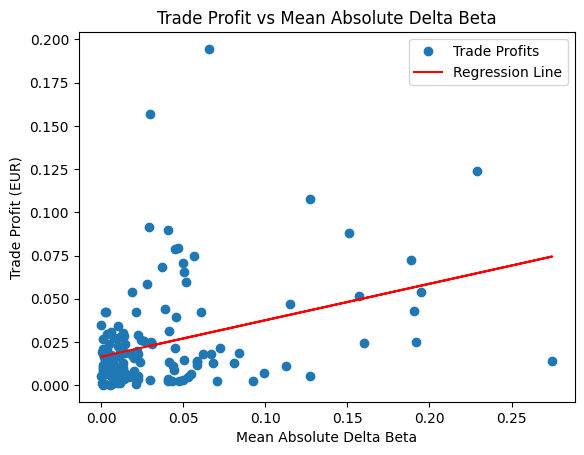

In [1797]:
#Plot trade profits vs absolute delta neutrality

from scipy import stats

#Get actual Betas used for each trade entry
beta_entries = [beta_series[entry] for entry in entry_times]

trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges

beta_series_trade_ranges = [beta_series[entry:exit] for entry, exit in trade_ranges]

#Calculate the absolute difference between the beta at the trade entry and the betas in the trade range
absolute_delta_betas = [np.abs(entry_beta - beta_range) for entry_beta, beta_range in zip(beta_entries, beta_series_trade_ranges)]

#Calculate the mean delta beta for each trade
mean_absolute_delta_betas = [np.mean(delta) for delta in absolute_delta_betas]


absolute_trade_returns = [np.abs(trade_profit/initial_capital) for trade_profit in trade_profits]

#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_absolute_delta_betas, absolute_trade_returns)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#Plot trade profits vs absolute delta neutrality and the regression line

plt.plot(mean_absolute_delta_betas, absolute_trade_returns, 'o', label='Trade Profits')
plt.plot(mean_absolute_delta_betas, intercept + slope*np.array(mean_absolute_delta_betas), 'r', label='Regression Line')
plt.xlabel('Mean Absolute Delta Beta')
plt.ylabel('Trade Profit (EUR)')
plt.title('Trade Profit vs Mean Absolute Delta Beta')
plt.legend()


# #Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
# slope, intercept, r_value, p_value, std_err = stats.linregress(mean_absolute_delta_betas, trade_profits)

# print(f"Slope: {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")
# print(f"R-squared: {r_value**2:.4f}")
# print(f"P-value: {p_value:.4f}")

# #Plot trade profits vs absolute delta neutrality and the regression line
# plt.plot(mean_absolute_delta_betas, trade_profits, 'o', label='Trade Profits')
# plt.plot(mean_absolute_delta_betas, intercept + slope*np.array(mean_absolute_delta_betas), 'r', label='Regression Line')
# plt.xlabel('Absolute Delta Neutrality')
# plt.ylabel('Trade Profit (EUR)')
# plt.title('Trade Profit vs Absolute Delta Neutrality')
# plt.legend()
# plt.show()

# plt.scatter(absolute_delta_neutrality, trade_profits, )
# plt.xlabel('Delta Neutrality')
# plt.ylabel('Trade Profit (EUR)')
# plt.title('Trade Profit vs Delta Neutrality')


Slope: 0.0001
Intercept: 0.0016
R-squared: 0.3152
P-value: 0.0000
There is a significant relationship between trade durations and mean absolute delta beta


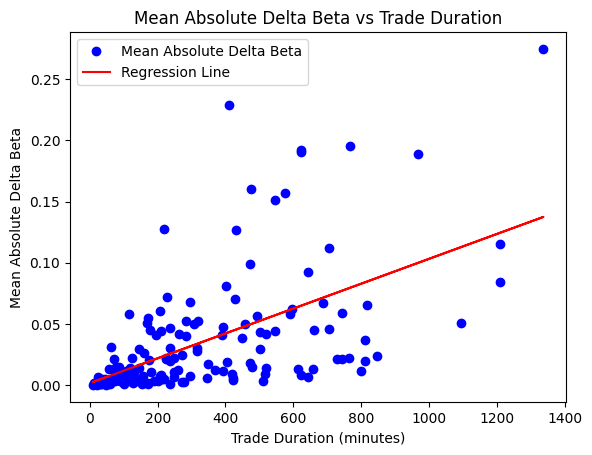

In [1792]:
#Plot mean_absolute_delta_betas against trade durations with a regression line

#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(trade_durations, mean_absolute_delta_betas)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant relationship between trade durations and mean absolute delta beta")
else:
    print("There is no significant relationship between trade durations and mean absolute delta beta")


#Plot trade profits vs absolute delta neutrality and the regression line
plt.plot(trade_durations, mean_absolute_delta_betas, 'o', label='Mean Absolute Delta Beta', color='blue')
plt.plot(trade_durations, intercept + slope*np.array(trade_durations), 'r', label='Regression Line')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Mean Absolute Delta Beta')
plt.title('Mean Absolute Delta Beta vs Trade Duration')
plt.legend()
plt.show()


In [1786]:
len(mean_absolute_delta_betas)

149

In [1743]:
#Plot distributions of beta_series_trade_ranges in multiple subplots



In [1744]:
len(mean_beta_trade_ranges)

151

In [1745]:
len(beta_series_trade_ranges)

149

Text(0.5, 1.0, 'Rolling Standard Deviation of GALA/USDT_2024_1m')

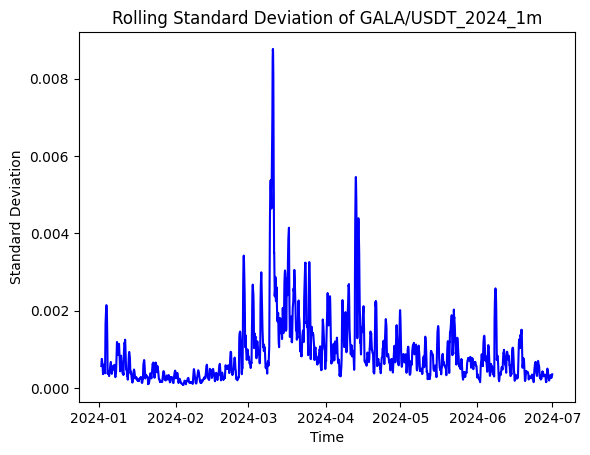

In [1746]:
#Calculate rolling standard deviation of S1 and S2
rolling_std_S1 = S1.rolling(window=window_size).std()
rolling_std_S2 = S2.rolling(window=window_size).std()

#Plot the rolling standard deviation of S1 and S2 on separate plots

plt.plot(rolling_std_S1, color='blue')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title(f'Rolling Standard Deviation of {sym1}')




Text(0.5, 1.0, 'Rolling Standard Deviation of GRT/USDT_2024_1m')

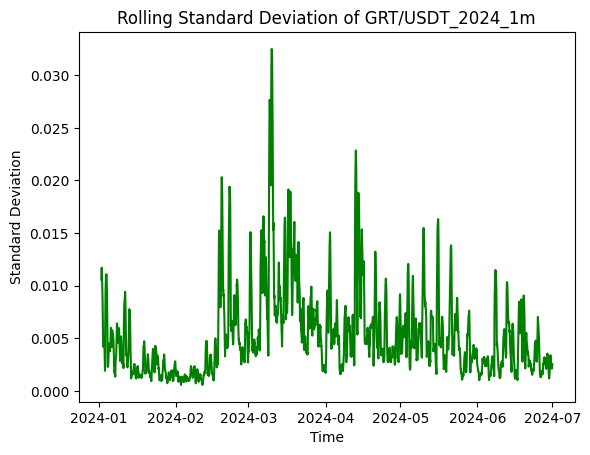

In [1747]:
plt.plot(rolling_std_S2, color='green')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title(f'Rolling Standard Deviation of {sym2}')

In [1748]:
#Get index of negative trade profits
negative_trade_profits_indeices = [i for i, x in enumerate(trade_profits) if x < 0]

#Get the corresponding trade entry and exit times
negative_trade_entry_times = [entry_times[i] for i in negative_trade_profits_indeices]
negative_trade_exit_times = [exit_times[i] for i in negative_trade_profits_indeices]


Trade 1 : 2024-03-09 09:43:00 to 2024-03-09 23:19:00 (win)


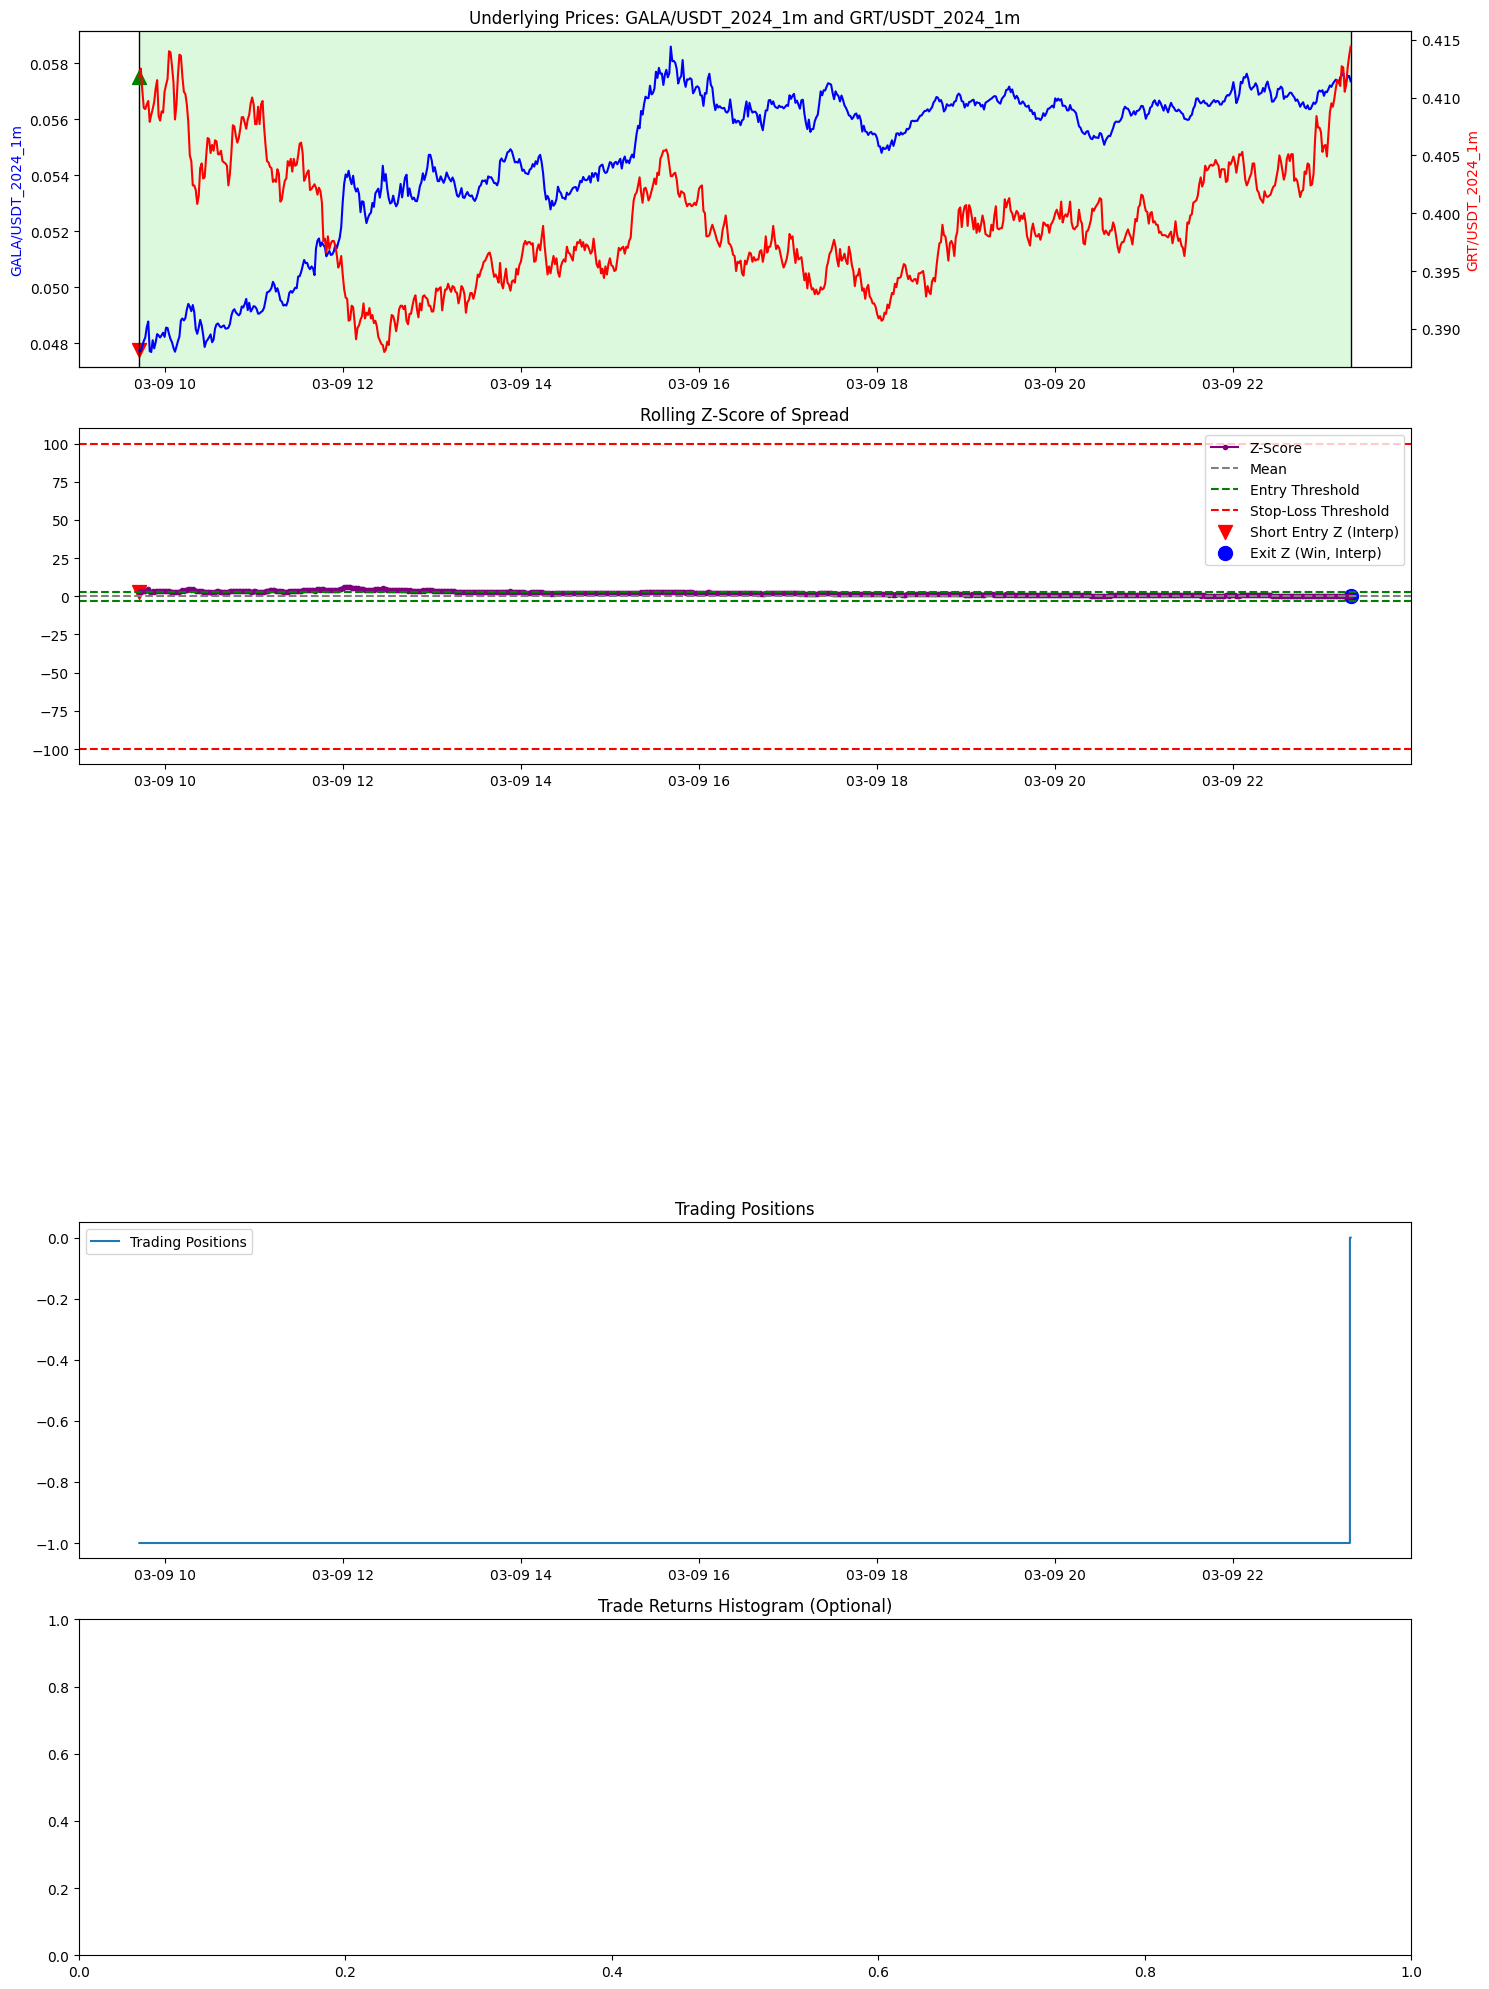

In [1749]:
#Plot trading simulation

# window_start = pd.to_datetime('2024-03-01 00:00:00')
# window_end = pd.to_datetime('2024-03-25 00:00:00')

#Window for biggest loss
window_start = pd.to_datetime(trade_entry_min_profit[0])
window_end = pd.to_datetime(trade_exit_min_profit)

# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

# S1 = S1_mid_price
# S2 = S2_mid_price

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



In [1750]:
trade_exits

[{'time': Timestamp('2024-01-03 14:36:00'),
  'S1': np.float64(0.02638),
  'S2': np.float64(0.1822),
  'z': np.float64(0.4437793572057443),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-04 18:33:00'),
  'S1': np.float64(0.02781),
  'S2': np.float64(0.1931),
  'z': np.float64(-0.006850665086966855),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-05 12:46:00'),
  'S1': np.float64(0.02661),
  'S2': np.float64(0.1854),
  'z': np.float64(0.01548870530147696),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-06 23:04:00'),
  'S1': np.float64(0.02594),
  'S2': np.float64(0.1703),
  'z': np.float64(-0.02746432362868778),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-07 04:17:00'),
  'S1': np.float64(0.0266),
  'S2': np.float64(0.1732),
  'z': np.float64(-0.043846300802941766),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-08 04:01:00'),
  'S1': np.float64(0.02312),
  'S2': np.float64(0.1528),
  'z': np.float64(0.017604863748724144),
  'exit_type': 'win'},
 {'time': Ti

In [1751]:
#Check slippage

#Get timestampe of trade entries and exits
entry_times = [x['time'] for x in trade_entries]
exit_times = [x['time'] for x in trade_exits]

#Get the actual entry and exit prices of the two assets at the time of trade entries and exits
S1_actual_entry_prices = [x['S1'] for x in trade_entries]
S2_actual_entry_prices = [x['S2'] for x in trade_entries]

S1_actual_exit_prices = [x['S1'] for x in trade_exits]
S2_actual_exit_prices = [x['S2'] for x in trade_exits]

#Get the mid prices of the two assets at the time of trade entries and exits
S1_entry_mid_prices = S1_mid_price.loc[entry_times]
S2_entry_mid_prices = S2_mid_price.loc[entry_times]

S1_exit_mid_prices = S1_mid_price.loc[exit_times]
S2_exit_mid_prices = S2_mid_price.loc[exit_times]

#Get the slippage for the two assets
S1_entry_slippage_percentage = (S1_actual_entry_prices - S1_entry_mid_prices) / S1_entry_mid_prices * 100
S2_entry_slippage_percentage = (S2_actual_entry_prices - S2_entry_mid_prices) / S2_entry_mid_prices * 100

S1_exit_slippage_percentage = (S1_actual_exit_prices - S1_exit_mid_prices) / S1_exit_mid_prices * 100
S2_exit_slippage_percentage = (S2_actual_exit_prices - S2_exit_mid_prices) / S2_exit_mid_prices * 100


NameError: name 'S1_mid_price' is not defined

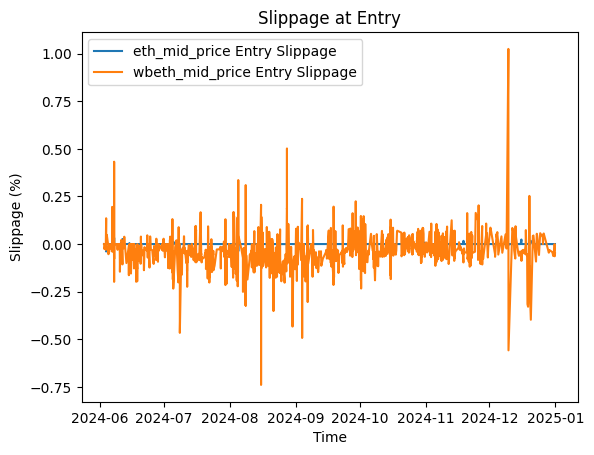

In [ ]:

#Create plots for slippage

plt.plot(S1_entry_slippage_percentage, label=f'{sym1} Entry Slippage')
plt.plot(S2_entry_slippage_percentage, label=f'{sym2} Entry Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Entry')
plt.legend(loc='upper left')
plt.show()


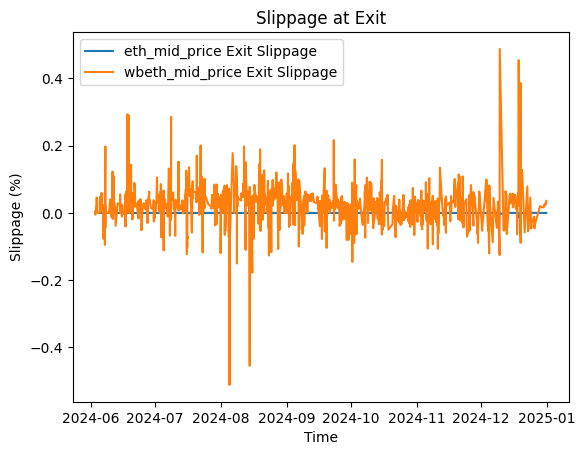

In [ ]:
plt.plot(S1_exit_slippage_percentage, label= f'{sym1} Exit Slippage')
plt.plot(S2_exit_slippage_percentage, label= f'{sym2} Exit Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Exit')
plt.legend(loc='upper left')
plt.show()

In [42]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------


In [43]:

def calculate_avg_abs_pct_reversion(trade_entries, trade_exits):
    """
    Calculate the average absolute percentage reversion from trade entry to trade exit
    for both asset price series (S1 and S2), using the interpolated trade data.
    
    Args:
        trade_entries (list): List of dictionaries for trade entries.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'position'
        trade_exits (list): List of dictionaries for trade exits.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'exit_type'
    
    Returns:
        overall_avg (float): The average of the average absolute percentage changes for S1 and S2.
    """
    S1_pct_changes = []
    S2_pct_changes = []
    
    # Loop over paired trade entries and exits.
    for entry, exit in zip(trade_entries, trade_exits):
        entry_S1 = entry['S1']
        entry_S2 = entry['S2']
        exit_S1 = exit['S1']
        exit_S2 = exit['S2']
        
        # Calculate absolute percentage change for each asset.
        pct_change_S1 = np.abs((exit_S1 - entry_S1) / entry_S1 * 100)
        pct_change_S2 = np.abs((exit_S2 - entry_S2) / entry_S2 * 100)
        
        S1_pct_changes.append(pct_change_S1)
        S2_pct_changes.append(pct_change_S2)
    
    # Compute the average absolute percentage change for S1 and S2.
    avg_abs_S1 = np.mean(S1_pct_changes) if S1_pct_changes else 0
    avg_abs_S2 = np.mean(S2_pct_changes) if S2_pct_changes else 0
    
    # Overall average is the average of the two.
    overall_avg = (avg_abs_S1 + avg_abs_S2) / 2
    
    print(f"Average absolute S1 price change percent: {avg_abs_S1:.2f}%")
    print(f"Average absolute S2 price change percent: {avg_abs_S2:.2f}%")
    print(f"Average of average absolute price changes: {overall_avg:.2f}%")
    
    return overall_avg



In [44]:
overall_avg_reversion = calculate_avg_abs_pct_reversion(trade_entries, trade_exits)

Average absolute S1 price change percent: 0.21%
Average absolute S2 price change percent: 0.22%
Average of average absolute price changes: 0.21%
